# Project: Gapminder data
### Enock Gansou,  Subhee Rawal, Danny Goldberg
## Part 1 - Regression analysis of Gapminder data

In this part of this project, we will practice and experiment with linear regression using data from gapminder.org. We will use a subset of data provided by gapminder provided by Jennifer Bryan described in it’s github page. Get the data from: https://github.com/jennybc/gapminder/blob/master/data-raw/08_gap-every-five-years.tsv

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from ggplot import *
import numpy as np
from sklearn import linear_model

data = pd.read_csv("gap.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Exercise 1

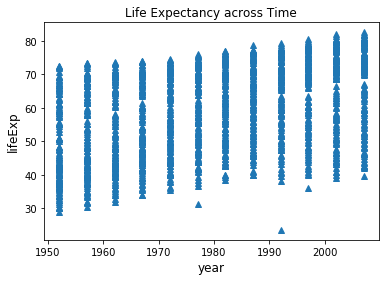

In [115]:
%matplotlib inline

plt.title("Life Expectancy across Time", fontsize=12)
plt.plot(data['year'].values, data['lifeExp'].values, "^")
plt.xlabel("year", fontsize=12)
plt.ylabel("lifeExp", fontsize=12)
plt.figure(figsize=(20,20))

plt.show()

### Question 1 

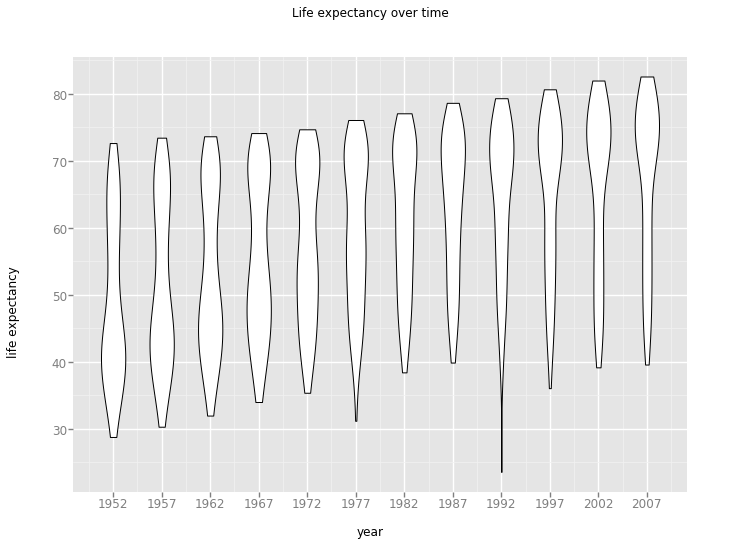

<ggplot: (8782865492586)>

In [116]:
ggplot(aes(x='year', y='lifeExp'), data=data) +\
    geom_violin() +\
    labs(title="Life expectancy over time",
         x = "year",
         y = "life expectancy")

The general trend for the life expectancy across time is increasing in general. From the plot it can be seen this trend is linear since we can see that through the time the distribution of life expectancy goes from bottom-heavy to top-heavy.

### Question 2

The distribution of life expectancy across countries during the initial years 1952-1982, is bimodal. The tail is 
also skewed towards higher life expectancy. 

Whereas from year 1987 and higher, the life expexctancy is unimodal. The tail is also skewed towards lower life expectancy. 

### Question 3
There linear correlation between the life expexctancy and year appears to be very strong. Therefore, I would expect to 
reject the null hyptothesis(no correlation) as it is unlikely that the data would have been that linearif there weren't a relationship 
between the life expectancy and year.

### Question 4
The violin plot for the residulas should be symmetric.
It the earlier years the mode was towards the bottom, and this should also be the case for the residulas plot since
regression line should cut through higher than the mode. Whereas in later years the mode was towards the top and this 
also be the case for the residulas plot.

### Question 5
I think that the linear regression line would increase through the years. It would also slice through the
centre of the violin plot each year. Therefore in the early years when mode is towards the bottom we would expect
the mode in the residual plot also, to be towards the bottom (negative residuals). Whereas in the later years we would expect it to be at the top (have positive residuals).

## Exercise 2

In [117]:

from sklearn import linear_model
reg = linear_model.LinearRegression()
# X = [[x] for x in data['year'].values]
X = np.array([[x] for x in data['year']])
Y = data['lifeExp']
regfit = reg.fit(X, Y)
print('Per year growth in life expectancy is', regfit.coef_[0])
print('Y intercept of life expectancy is', regfit.intercept_)
print('Predicted life expectancy for 1970 is',regfit.predict(1970)[0])
# regfit.score(X,Y)
# print('pvalues is ',regfit.pvalues[1])

Per year growth in life expectancy is 0.325903827637
Y intercept of life expectancy is -585.652187442
Predicted life expectancy for 1970 is 56.3783530036


In [118]:
regfit.score(X,Y)

import statsmodels.formula.api as sm

olsres = sm.ols(formula='lifeExp ~ year',data=data).fit()
print("The p values are")
olsres.pvalues

The p values are


Intercept    2.897807e-67
year         7.546795e-80
dtype: float64

### Question 6
The average life expectancy increases 0.3259 years per year.

### Question 7
We would reject the null hypothesis, since the p-value is much lower than the proportion of 0.05

## Exerciese 3

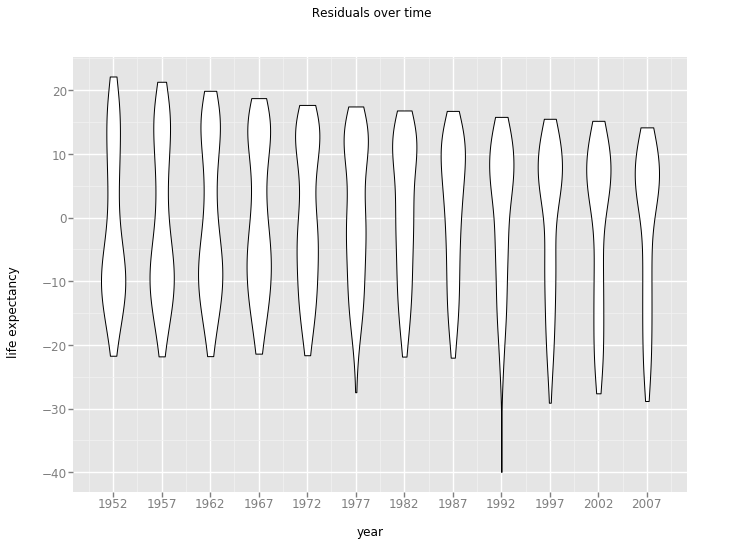

<ggplot: (8782867173717)>

In [119]:
data['predicted_lifeExp'] = data.apply(lambda row: regfit.predict(row['year'])[0], axis=1)
data['residual'] = data['lifeExp'] - data['predicted_lifeExp']

ggplot(aes(x='year', y='residual'), data=data) +\
    geom_violin() +\
    labs(title=" Residuals over time",
         x = "year",
         y = "life expectancy")

### Question 8
Yes, the plot of Exercise 3 matches my expectations since it is linear.

## Exerciese 4

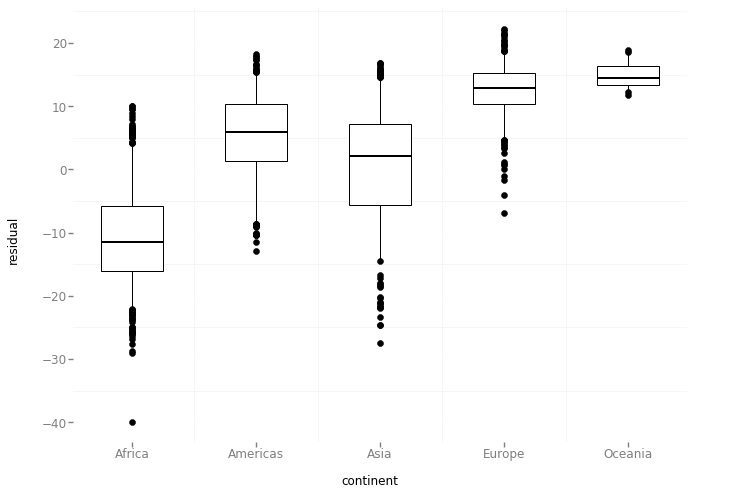

<ggplot: (8782893055566)>

In [120]:
ggplot(aes(x='continent', y='residual'), data = data) +\
    geom_boxplot() + theme_bw()

### Question 9
Yes, based on the residuals it can be seen Oceania has a much higher life expectancy than any other continent. 
Whereas Africa has a much lower life expectancy than the other continents. Europe too has a relatively higher life 
excpectancy (higher than average) except for the outliers. 
## Exercise 5

/opt/conda/lib/python3.6/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


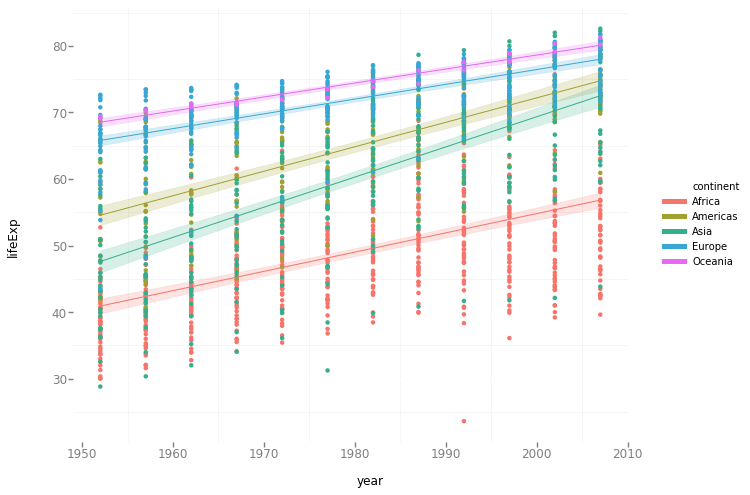

<ggplot: (-9223363253987541041)>

In [121]:
import statsmodels

ggplot(aes(x='year', y='lifeExp', color='continent'), data=data) +\
    stat_smooth(method = "lm") + theme_bw() + geom_point(size=20)

### Question 10
Based on the plot observed, there should be an interaction term with the conitnents as it appears each continent 
has its own regression line.
## Exercise 6

In [122]:
import statsmodels.formula.api as sm
model = sm.ols(formula="lifeExp ~ year*continent", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Tue, 21 Nov 2017   Prob (F-statistic):               0.00
Time:                        02:22:30   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -524.2578     32.963    -15.904      0.000    -588.911    -459.605
continent[T.Americas]       -138.8484     57.851     -2.400      0.016    -252.315     -25.382
continent[T.Asia]           -312.6330     52.904     -5.909      0.000    -416.396    -208.870
continent[T.Europe]          156.8469     54.498      2.878      0.004      49.957     263.737
continent[T.Oceania]         182.3499    171.283      1.065      0.287    -153.599     518.298
year                           0.2895      0.017     17.387      0.000       0.257       0.322
year:continent[T.Americas]     0.0781      0.029      2.673      0.008       0.021       0.135
year:continent[T.Asia]         0.1636      0.027      6.121      0.000       0.111       0.216
year:continent[T.Europe]      -0.0676      0.028     -2.455      0.014      -0.122      -0.014
year:continent[T.Oceania]     -0.0793      0.087     -0.916      0.360      -0.249       0.090
==============================================================================
Omnibus:                       27.121   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.106
Skew:                          -0.121   Prob(JB):                     2.65e-10
Kurtosis:                       3.750   Cond. No.                     2.09e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Question 11
No, not all parameters are significantly different than zero. Using the proportion as 0.05, Oceania's p-value (0.36)is too
high to reject the null hypothesis(no relationship between year and life expectancy). But all other continents such
as Africa, America, Antartica and Europe, these all have a significantly low p-value (proportion < 0.05) and here we can
reject the null hyptothesis (no relationship between year and life expectancy) and say the life expectancy and year 
is correlated. But this cannot be assumed for Oceania based on our hypothesis and data.

### Question 12

In [123]:
print("Coef :")
print(model.params)

# The average life exptancy increase each year for each continent is shown by the coeefficient below. 
# Africa is represtend without a variable.  
# Therefore we can say in:
         # Africa: the average life expectancy increases by 0.289529 years 
         # America: the average life expectancy increase is 0.078122 + 0.289529 = 0.367651
         # Asia: the average life expectancy increase is  0.163593 + 0.289529 = 0.453122
         # Europe: the average life expectancy increase is -0.067597 + 0.289529 = 0.221932
         # Oceania: the average life expectancy increase is -0.079257 + 0.289529 = 0.210272
         # Africa: the average life expectancy increase is 0.289529print(model.params)

Coef :
Intercept                    -524.257846
continent[T.Americas]        -138.848447
continent[T.Asia]            -312.633049
continent[T.Europe]           156.846852
continent[T.Oceania]          182.349883
year                            0.289529
year:continent[T.Americas]      0.078122
year:continent[T.Asia]          0.163593
year:continent[T.Europe]       -0.067597
year:continent[T.Oceania]      -0.079257
dtype: float64


## Exercise 7

In [124]:
print('fvalue from exercise 2 is',olsres.fvalue)
print('pvalue from exercise 2 is',olsres.f_pvalue)
print('fvalue from exercise 6 is',model.fvalue)
print('pvalue from exercise 6 is',model.f_pvalue)

fvalue from exercise 2 is 398.604745712
pvalue from exercise 2 is 7.5467946256e-80
fvalue from exercise 6 is 424.27290234
pvalue from exercise 6 is 0.0


### Question 13
Yes, the interaction model is significantly better than year-only model, because with the interaction model we are 
able to determine that Oceania has too high a p-value to reject the null hypothesis. Thus we cannot establish a 
trend between year and life-expectanncy for Oceania,but for the other continents we were able to re-establish this 
trend. Also comparing the two OLS regression results, the interaction model has a higher R-squared and F-statistic. 
Thus with the interaction model we are able to more accurately observe and model the data

## Exercise 8

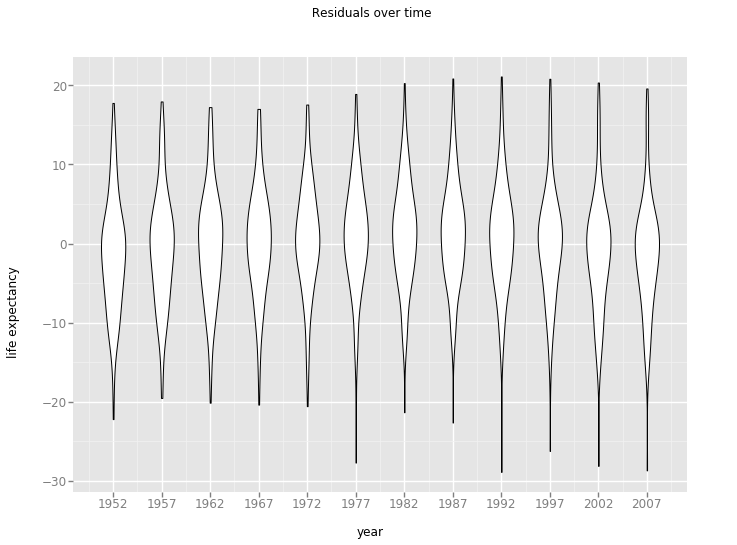

<ggplot: (-9223363253989169120)>

In [125]:
data['residual_fitted'] = data['lifeExp'] - model.fittedvalues
ggplot(aes(x='year', y='residual_fitted'), data=data) +\
    geom_violin() +\
    labs(title=" Residuals over time",
         x = "year",
         y = "life expectancy")

# Part 2 - Classification

## Problem 1

In [126]:
# Training data (X, y), T time steps, alpha step

def grad_descent(X, y, T, alpha):
    m, n = X.shape # m = #examples, n = #features
    theta = np.zeros(n) # initialize parameters
    f = np.zeros(T) # track loss over time
    for i in range(T):
        # loss for current parameter vector theta
        f[i] = 0.5*np.linalg.norm(X.dot(theta) - y)**2
        # compute steepest ascent at f(theta)
        g = X.T.dot(X.dot(theta) - y)
        # step down the gradient
        theta = theta - alpha*g
    return theta, f

## Problem 2

For logistic regression, the form of our hypothesis, $h_\theta(x)$, is as follows:
$$h_\theta(x) = \frac{1}{1+e^{-\theta^Tx}}$$
Let $g(\theta^Tx) = h_\theta(x)$
Therefore,
$$g(z) = \frac{1}{1+e^{-z}}$$
$g(z)$ is the logistic function

A useful property of $g(z)$ is as follows: $g'(z) = g(z)(1-g(z))$

Let's assume that
$$P(y = 1 | x; \theta) = h_\theta(x)$$
$$P(y = 0 | x; \theta) = 1 - h_\theta(x)$$

This can be written more compactly as:
$$p(y | x; \theta) = (h_\theta(x))^y(1-h_\theta(x))^{1-y}$$

Assuming that m training examples are generated independently, we can then write down the likelihood of the parameters as:
$$L(\theta) = p(\vec{y} | X;\theta)$$
$$=\prod\limits_{i=1}^m p(y^{(i)}|x^{(i)};\theta)$$
$$=\prod\limits_{i=1}^m (h_\theta(x^{(i)}))^{y^{(i)}}(1 - h_\theta(x^{(i)}))^{y^{(i)}}$$

From here, we will find the log likelihood and maximize it.
$$\ell(\theta) = log L(\theta)$$
$$= \sum\limits_{i=1}^m y^{(i)}log (h(x^{(i)})) + (1 - y^{(i)})log (1 - h(x^{(i)}))$$

Given $g'(z) = g(z)(1-g(z))$
$$\frac{\partial}{\partial{\theta_j}}\ell(\theta) = \
(y(1 - g(\theta^Tx)) - (1 - y)g(\theta^Tx))x_j$$
$$= (y-h_\theta(x))x_j$$

Since we are maximizing rather than minimizing, we need to add the gradient rather than subtract it.

Therefore, our update equation is as follows:
$$\theta_k = \theta_{k-1} + \alpha(y-h_\theta(x))x_j$$
where
$$h_\theta(x) = \frac{1}{1+e^{-\theta^Tx}} = \frac{e^{\theta^Tx}}{e^{\theta^Tx} + 1}$$

## Problem 3

In [127]:
import numpy as np

def gradient_descent(X, Y, alpha, K):
   
    ones = [[a] for a in np.ones(len(X))]
    X = np.hstack((ones,X))
   

    N, D = X.shape
    #initialize weights and loss
    weights = np.zeros(D)
    loss = np.zeros(K)

    for i in range(K):
        # make predictions for ith iteration
        prediction = 1/(1+np.exp(-X.dot(weights)))
       
        # compute loss for kth iteration
        y_1 = Y * np.log(prediction)

        y_0 = (1-Y) * np.log(1 - prediction)
        
        # When the prediction is exactly 1, b becomes NaN because log(1-1) = 0 = NaN
        # If 1 - prediction is 0, then prediction is 1
        # We can only get this condition when Y is supposed to be 1
        # Therefore, in this situation, our prediction is perfect and there is zero loss
        # for that datapoint
        
        y_0 = np.nan_to_num(y_0)
        va = y_1 + y_0
        loss[i] = abs(np.mean(va))
    
        # compute direction of greatest descent
        descent = X.T.dot(Y-prediction)
        
        # update theta by taking a step in direction of gradient
        weights = weights + alpha * descent      

    return weights, loss

# we used the batch version

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply


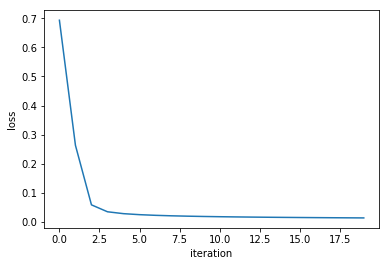

In [145]:
from sklearn import datasets

# testing out the above method and plotting the losses
# simulate data for linear regression

gen_data_x, gen_data_y = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)

#simulate data for logistic regression.  This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]

wehts,lox = gradient_descent(np.array(log_gen_data_x), np.array(log_gen_data_y), 0.2, 20)
plt.plot(lox)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

## Problem 4

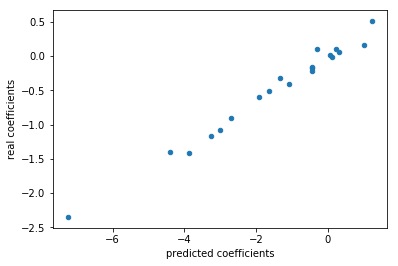

In [129]:
test = linear_model.LogisticRegression()
test = test.fit(log_gen_data_x,log_gen_data_y)

df = pd.DataFrame()

df['real coefficients'] = test.coef_[0]
df['predicted coefficients'] = wehts[1:]
##print(test.coef_[0].shape)
##print(wehts[1:].shape)
df.plot.scatter(x='predicted coefficients',y='real coefficients')

## Try it Out

In [191]:
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [131]:
# import some data to play with
# the dataset that were are using is the iris dataset.
iris = datasets.load_iris()

In [240]:
clf = tree.DecisionTreeClassifier()
print(cross_val_score(clf,log_gen_data_x, log_gen_data_y,cv=10))

[ 0.45454545  0.54545455  0.9         0.4         0.6         0.7         0.4
  0.7         0.88888889  0.77777778]


In [257]:
c = iris.target[iris.target < 2]
print(c)
r = iris.data[iris.target < 2]
print(r[0:5])
print(iris.data[0:5])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [216]:
from sklearn.model_selection import KFold
test = linear_model.LogisticRegression()

In [255]:
kf = KFold(n_splits=10);
kf.get_n_splits(log_gen_data_x)

result = [None]*10
result2 = [None]*10
result3 = [None]*10
i = 0
for train_index, test_index in kf.split(log_gen_data_x):
    X_train, X_test = np.array(log_gen_data_x)[train_index], np.array(log_gen_data_x)[test_index]
    y_train, y_test = np.array(log_gen_data_y)[train_index], np.array(log_gen_data_y)[test_index]
    
    weights, loss = gradient_descent(X_train, y_train, .2, 50)
    
    p = X_test.dot(weights[1:])
    y_predictions = (np.exp(p)/(1+np.exp(p)) >= 0.5).astype(int)
    
    # using some method
    clf = test.fit(X_train, y_train)
    result2[i] = clf.score(X_test, y_test)
    
    result[i] = (y_test == y_predictions).mean()
    i = i+1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply


In [258]:
linear_model = svm.LinearSVC()
linear_scores = cross_val_score(linear_model, X, Y, cv=10)
stats.ttest_rel(result,linear_scores)

Ttest_relResult(statistic=1.0, pvalue=0.34343639613791355)

In [266]:
## error
stats.sem(linear_scores)

0.02108185106778919